In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
##Here I solved a problem where I knew distrubition was gaussian. I tried verify that parameter_true can be calculated by using chi^2 ->
## to do minimum value. and then covariance for the parameter is the inverse of fisher matrix (For the best parameter of course)!



In [5]:
#These are the parameters
a_true = 5
v = np.array([1,2])
C = np.array([[2,0.5],[0.5,1]])
mean = a_true*v_par
N_sim = 10000

#This is my distribution 
np.random.seed(42)
data_samples =  np.random.multivariate_normal(mean, C, N_sim)

print(f'A multivariate gaussian distrubition numbers drawn({N_sim} times) where mean ={mean} and covariance = {C}')



A multivariate gaussian distrubition numbers drawn(10000 times) where mean =[ 5 10] and covariance = [[2.  0.5]
 [0.5 1. ]]


In [8]:
## Calculating theoretical variance
C_inv = np.linalg.inv(C)
print('Fisher information (dµ/dΘ)C^-1(dµ/dΘ)')
#fisher information 
F = v_par.T@C_inv@v_par
print(f'theoretical best variance inverse fisher matrix in this case 1/F = {1/F}')


## A_best = v^TC^-1/v^TC^-1v @ X->  this will give the best A in terms of parameter.
numerators = v.T @ C_inv @ data_samples.T
a_best_list = numerators /F

measured_variance = np.var(a_best_list)
measured_mean = np.mean(a_best_list)
print(f'measured variance = {measured_variance}')
print(f'measured_mean = {measured_mean}')

print(f'relative error {(measured_variance - 1/F)*F}')


Fisher information (dµ/dΘ)C^-1(dµ/dΘ)
theoretical best variance inverse fisher matrix in this case 1/F = 0.25
[4.80192966 5.4423569  4.97025323 ... 4.88873901 4.76409391 3.84658061]
measured variance = 0.2502804982006055
measured_mean = 5.0021883664978555
relative error 0.0011219928024219783


0.7978841614614433


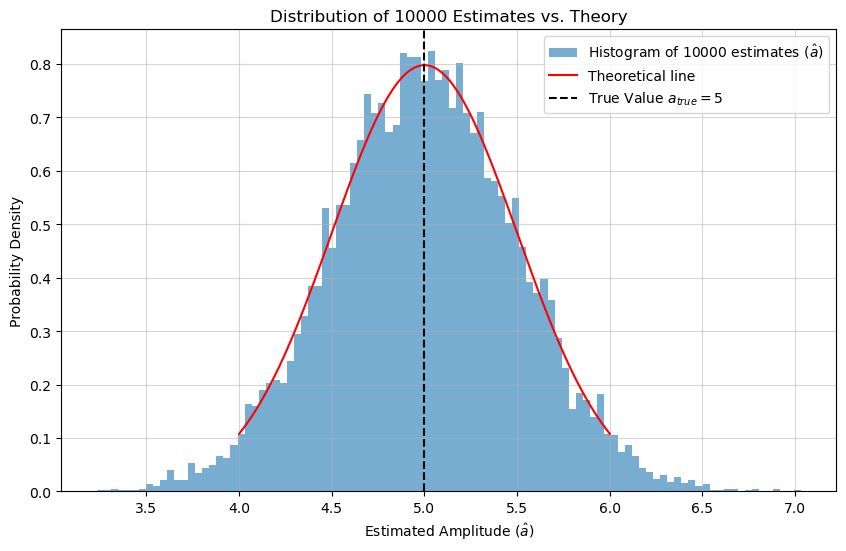

In [30]:
import scipy.stats as stats

plt.figure(figsize=(10,6))
x_axis = np.linspace(a_true-4*(1/F),a_true +4*(1/F),2000)
theoretical_pdf = stats.norm.pdf(x_axis,loc = a_true ,scale = (1/F)**0.5)

print(max(theoretical_pdf))
plt.hist(a_best_list, bins=100, density=True, alpha=0.6, label=f'Histogram of {N_sim} estimates ($\\hat{{a}}$)')

plt.plot(x_axis , theoretical_pdf , color = 'red' , label = f'Theoretical line')

plt.axvline(a_true, color='k', linestyle='--', label=f'True Value $a_{{true}} = {a_true}$')
plt.xlabel('Estimated Amplitude ($\\hat{a}$)')
plt.ylabel('Probability Density')
plt.title(f'Distribution of {N_sim} Estimates vs. Theory')
plt.legend()
plt.grid(True , alpha=0.5)

plt.legend()
plt.show()
